In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import datetime
import calendar

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import seaborn as sns

plt.style.use('Cole_2018.mplstyle')
sns.set_style('whitegrid')

# 1. Load data
* Data was scraped and processed in the previously numbered notebooks

In [2]:
# Load table of fact checks
df_checks = pd.read_csv('/gh/data/politifact/20190701scrape/processed_v2.csv')
df_checks['date'] = pd.to_datetime(df_checks['date'])
df_checks.head()

,name,statement,source,date,finding,comment,article_page,identity_id,truth_score
0,Donald Trump,"""The Obama administration was begging for a me...",PolitiFact National,2019-07-01,False,Obama set high bar for meetings,/truth-o-meter/statements/2019/jul/01/donald-t...,donald-trump,1.0
1,Facebook posts,Six Flags is offering five free passes and unl...,PolitiFact Facebook fact-checks,2019-07-01,False,Summer scam-o-rama,/facebook-fact-checks/statements/2019/jul/01/f...,facebook-posts,1.0
2,Beto O'Rourke,"""The Census is predicting a 6% undercount that...",PolitiFact Texas,2019-07-01,Half-True,Confuses key details,/texas/statements/2019/jul/01/beto-orourke/oro...,beto-orourke,3.0
3,Elizabeth Warren,"""Prison phone companies charge as much as $25 ...",PolitiFact National,2019-07-01,Mostly True,"In some jails, talk isn't cheap",/truth-o-meter/statements/2019/jul/01/elizabet...,elizabeth-warren,4.0
4,Ta-Nehisi Coates,"""The typical black family in this country has ...",PunditFact,2019-07-01,True,Racial gap has persisted for years,/punditfact/statements/2019/jul/01/ta-nehisi-c...,ta-nehisi-coates,5.0


In [3]:
# Load table of fact checks
df_info = pd.read_csv('/gh/data/politifact/20190707scrape_personalities/processed_v2.csv')
df_info.head()

,title,bio,party_title,state,identity_id,name,identity_type
0,Our Texas Values feeds,"Established in 2012, Texas Values is an Austin...",NaN,NaN,texas-values,Texas Values,NaN
1,Democrat from Ohio,Teresa Fedor is a Democrat in the Ohio House o...,D,Ohio,teresa-fedor,Teresa Fedor,NaN
2,Our Susana Mendoza feeds,Susana Mendoza is the Illinois comptroller. Me...,NaN,NaN,susana-mendoza,Susana Mendoza,NaN
3,Republican from Virginia,"Stephen Martin, R-Chesterfield, represents the...",R,Virginia,stephen-martin,Stephen Martin,NaN
4,None from Ohio,Brent Larkin writes a weekly column for The Pl...,NaN,Ohio,brent-larkin,Brent Larkin,NaN


In [4]:
# Merge identity info into fact checks
df = df_checks.merge(df_info, on=['name', 'identity_id'])
df.head()

,name,statement,source,date,finding,comment,article_page,identity_id,truth_score,title,bio,party_title,state,identity_type
0,Donald Trump,"""The Obama administration was begging for a me...",PolitiFact National,2019-07-01,False,Obama set high bar for meetings,/truth-o-meter/statements/2019/jul/01/donald-t...,donald-trump,1.0,Republican from New York,Donald Trump is the president of the United St...,R,New York,person
1,Donald Trump,"California ""admitted"" there were ""a million"" i...",PolitiFact California,2019-06-24,Pants on Fire!,Voter fraud claim remains baseless,/california/statements/2019/jun/24/donald-trum...,donald-trump,0.0,Republican from New York,Donald Trump is the president of the United St...,R,New York,person
2,Donald Trump,"Says the Central Park Five ""admitted their gui...",PolitiFact National,2019-06-24,Mostly False,No confession to the rape itself,/truth-o-meter/statements/2019/jun/24/donald-t...,donald-trump,2.0,Republican from New York,Donald Trump is the president of the United St...,R,New York,person
3,Donald Trump,"""When I became president, President Obama had ...",PolitiFact National,2019-06-21,False,"Repeated claim, still false",/truth-o-meter/statements/2019/jun/21/donald-t...,donald-trump,1.0,Republican from New York,Donald Trump is the president of the United St...,R,New York,person
4,Donald Trump,"""Well, I got 52% (of women voters). And I will...",PolitiFact National,2019-06-20,Mostly False,"Not all women, percent is only for white women",/truth-o-meter/statements/2019/jun/20/donald-t...,donald-trump,2.0,Republican from New York,Donald Trump is the president of the United St...,R,New York,person


In [5]:
# Add extra date cols
df_checks['year'] = df_checks['date'].dt.year
df_checks['month_name'] = df_checks['date'].dt.month_name()
df_checks['day_of_week'] = df_checks['date'].dt.day_name()
# df_checks['date_month_round'] = pd.to_datetime([datetime.datetime(dt.year, dt.month, 1) for dt in df_checks['date']])
df_checks['month_year'] = pd.to_datetime(['{}/{}'.format(dt.month, dt.year) for dt in df_checks['date']])

# 2. Change in truth rate over time

/Users/scott/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


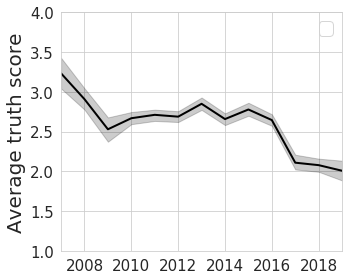

In [6]:
df_plt = df.copy()
df_plt['year'] = df_plt['date'].dt.year

plt.figure(figsize=(5,4))
sns.lineplot(x='year', y='truth_score', data=df_plt, color='k')
plt.legend(fontsize=18)
plt.ylim((1,4))
plt.ylabel('Average truth score')
plt.xlabel('')
plt.xlim((2007,2019))
plt.tight_layout()
plt.savefig('/gh/srcole.github.io/assets/politifact/8_avg_truth_by_year.png')

/Users/scott/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


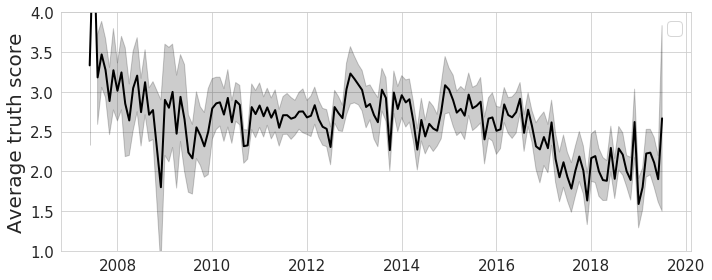

In [7]:
df_plt = df.copy()
df_plt['month'] = pd.to_datetime([datetime.datetime(dt.year, dt.month, 1) for dt in df_plt['date']])

plt.figure(figsize=(10,4))
sns.lineplot(x='month', y='truth_score', data=df_plt, color='k')
plt.legend(fontsize=18)
plt.ylim((1,4))
plt.ylabel('Average truth score')
plt.xlabel('')
# plt.xlim((2007,2019))
plt.tight_layout()
plt.savefig('/gh/srcole.github.io/assets/politifact/9_avg_truth_by_month.png')

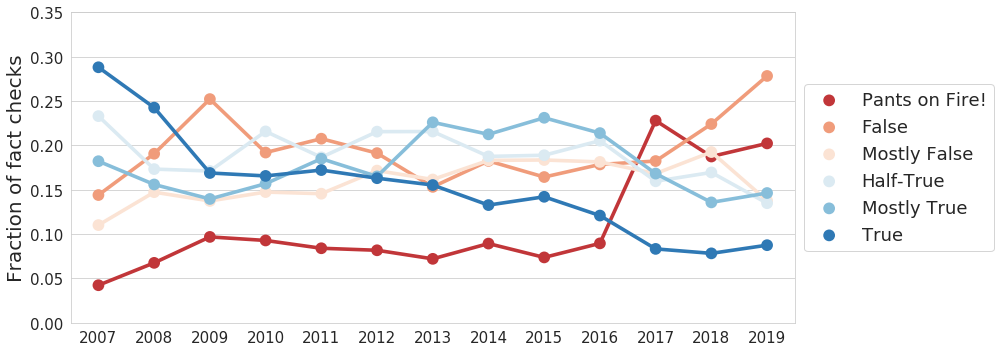

In [8]:
# Plot of fraction of checks in each truth category over years
df_plt = df.copy()
df_plt['year'] = df_plt['date'].dt.year
df_plt1 = df_plt.groupby(['truth_score', 'year'])['name'].count().reset_index().rename(columns={'name':'n_checks'})
df_plt2 = df_plt.groupby('year')['name'].count().reset_index().rename(columns={'name':'n_year'})
df_plt = df_plt1.merge(df_plt2, on=['year'], how='left')
df_plt['frac_checks'] = df_plt['n_checks'] / df_plt['n_year']
df_plt = df_plt[['truth_score', 'year', 'frac_checks']]

# Compute truth score avg for ordering
truth_score_dict = {'True': 5,
                    'Mostly True': 4,
                    'Half-True': 3,
                    'Mostly False': 2,
                    'False': 1,
                    'Pants on Fire!': 0}
score_to_truth = {v: k for k, v in truth_score_dict.items()}
df_plt['truth_score'] = df_plt['truth_score'].map(score_to_truth)

plt.figure(figsize=(14,5))
sns.pointplot(x='year', y='frac_checks', hue='truth_score', data=df_plt,
              palette=sns.color_palette("RdBu", 6)
             )
plt.legend(fontsize=18, bbox_to_anchor=(1,.5), loc='center left')
# plt.ylim((1,4))
plt.ylabel('Fraction of fact checks')
plt.xlabel('')
plt.ylim((0,.35))
plt.tight_layout()
plt.savefig('/gh/srcole.github.io/assets/politifact/10_truth_breakdown_by_year.png')

# 3. Is drop in truth due to Trump?

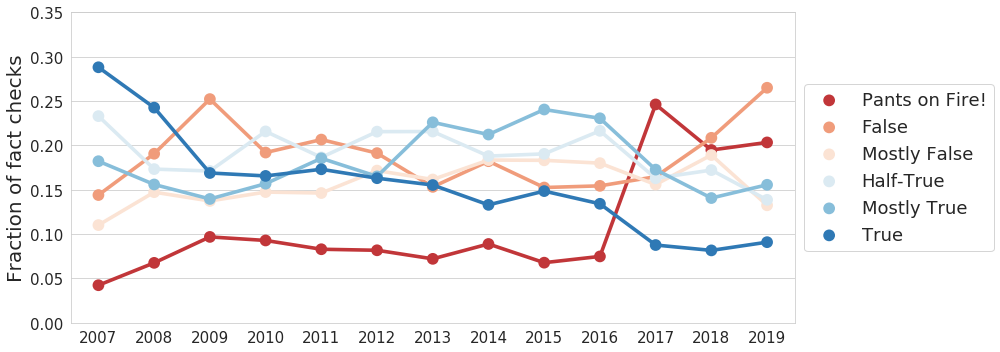

In [9]:
# Plot of fraction of checks in each truth category over years
df_plt = df.copy()

# REMOVE TRUMP
df_plt = df_plt[df_plt['name']!='Donald Trump']

df_plt['year'] = df_plt['date'].dt.year
df_plt1 = df_plt.groupby(['truth_score', 'year'])['name'].count().reset_index().rename(columns={'name':'n_checks'})
df_plt2 = df_plt.groupby('year')['name'].count().reset_index().rename(columns={'name':'n_year'})
df_plt = df_plt1.merge(df_plt2, on=['year'], how='left')
df_plt['frac_checks'] = df_plt['n_checks'] / df_plt['n_year']
df_plt = df_plt[['truth_score', 'year', 'frac_checks']]

# Compute truth score avg for ordering
truth_score_dict = {'True': 5,
                    'Mostly True': 4,
                    'Half-True': 3,
                    'Mostly False': 2,
                    'False': 1,
                    'Pants on Fire!': 0}
score_to_truth = {v: k for k, v in truth_score_dict.items()}
df_plt['truth_score'] = df_plt['truth_score'].map(score_to_truth)

plt.figure(figsize=(14,5))
sns.pointplot(x='year', y='frac_checks', hue='truth_score', data=df_plt,
              palette=sns.color_palette("RdBu", 6)
             )
plt.legend(fontsize=18, bbox_to_anchor=(1,.5), loc='center left')
# plt.ylim((1,4))
plt.ylabel('Fraction of fact checks')
plt.xlabel('')
plt.ylim((0,.35))
plt.tight_layout()
plt.savefig('/gh/srcole.github.io/assets/politifact/11_truth_breakdown_by_year_noTrump.png')

### 3b. Has Trump's truthiness changed over time?


/Users/scott/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


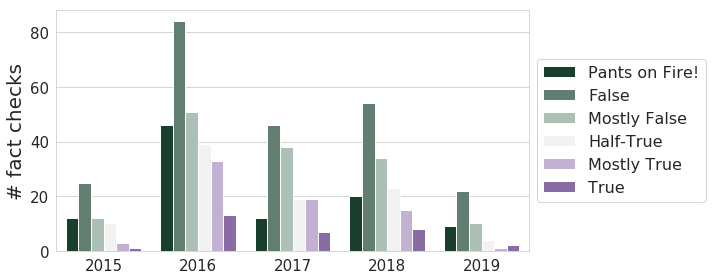

In [10]:
df_plt = df[df['name']=='Donald Trump']
df_plt['year'] = df_plt['date'].dt.year
df_plt = df_plt[df_plt['year'] >= 2015]

truth_score_dict = {'True': 5,
                    'Mostly True': 4,
                    'Half-True': 3,
                    'Mostly False': 2,
                    'False': 1,
                    'Pants on Fire!': 0}
score_to_truth = {v: k for k, v in truth_score_dict.items()}
df_plt['truth_score_name'] = df_plt['truth_score'].map(score_to_truth)

plt.figure(figsize=(10, 4))
sns.countplot(hue='truth_score_name', x='year', data=df_plt,
            palette=sns.diverging_palette(145, 280, s=85, l=25, n=7),
              hue_order = ['Pants on Fire!', 'False', 'Mostly False', 'Half-True', 'Mostly True', 'True']
           )
plt.legend(fontsize=16, loc='center left', bbox_to_anchor=(1,.5))
plt.ylabel('# fact checks')
plt.xlabel('')
plt.tight_layout()
plt.savefig('/gh/srcole.github.io/assets/politifact/12_truth_breakdown_by_year_Trump.png')


# 4. Variance explained by day of week or month of year

### 4a. More fact checks in October and on Fridays

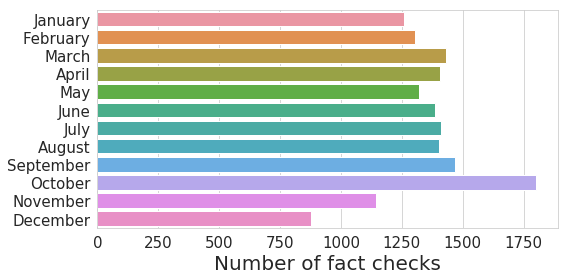

In [11]:
df_plt = df.copy()
df_plt['month'] = df_plt['date'].dt.month_name()

plt.figure(figsize=(8,4))
sns.countplot(y='month', data=df_plt,
              order=['January', 'February', 'March', 'April', 'May', 'June',
                     'July', 'August', 'September', 'October', 'November', 'December'])
plt.ylabel('')
plt.xlabel('Number of fact checks')
plt.tight_layout()
plt.savefig('/gh/srcole.github.io/assets/politifact/13_n_checks_by_month.png')

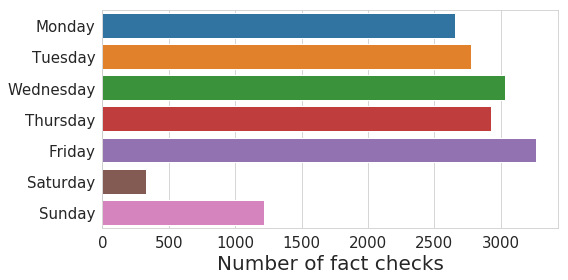

In [12]:
df_plt = df.copy()
df_plt['day_of_week'] = df_plt['date'].dt.day_name()

plt.figure(figsize=(8,4))
sns.countplot(y='day_of_week', data=df_plt,
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylabel('')
plt.xlabel('Number of fact checks')
plt.tight_layout()
plt.savefig('/gh/srcole.github.io/assets/politifact/14_n_checks_by_weekday.png')

### 4b. Truthiness does not vary much by month or day of week

/Users/scott/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


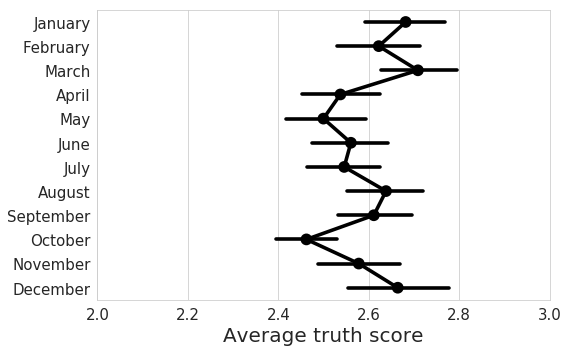

In [13]:
df_plt = df.copy()
df_plt['month'] = df_plt['date'].dt.month_name()

plt.figure(figsize=(8,5))
sns.pointplot(x='truth_score', y='month', data=df_plt, color='k',
              order=['January', 'February', 'March', 'April', 'May', 'June',
                     'July', 'August', 'September', 'October', 'November', 'December'])
plt.ylabel('')
plt.xlim((2, 3))
plt.xlabel('Average truth score')
plt.tight_layout()
plt.savefig('/gh/srcole.github.io/assets/politifact/15_avg_truth_by_month.png')

/Users/scott/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


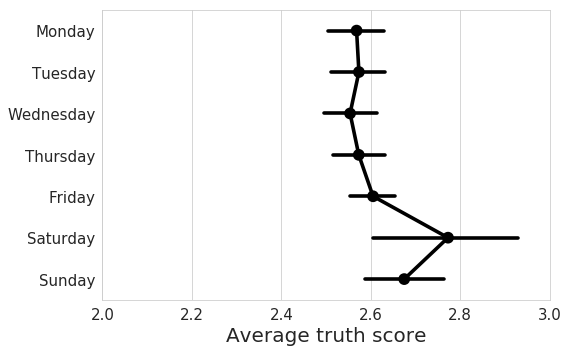

In [14]:
df_plt = df.copy()
df_plt['day_of_week'] = df_plt['date'].dt.day_name()

plt.figure(figsize=(8,5))
sns.pointplot(x='truth_score', y='day_of_week', data=df_plt, color='k',
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylabel('')
plt.xlim((2, 3))
plt.xlabel('Average truth score')
plt.tight_layout()
plt.savefig('/gh/srcole.github.io/assets/politifact/16_avg_truth_by_weekday.png')